In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from bluepy import Circuit
import seaborn as sns

In [3]:
c = Circuit('/gpfs/bbp.cscs.ch/project/proj112/circuits/CA1/20211110-BioM/CircuitConfig')

In [5]:
mtypes = sorted(list(c.cells.mtypes))

In [39]:
df = pd.DataFrame(columns=mtypes,index=mtypes)
for i in mtypes:
    for j in mtypes:
        if i == 'SP_PC' and j == 'SP_PC':
            df.loc[i,j] = 2.79
        elif i == 'SP_PC' and j in ['SP_PVBC','SP_CCKBC','SP_AA']:
            df.loc[i,j] = 1.08
        else:
            df.loc[i,j] = (2.79+1.08)/2
df = df.astype(float)

Text(0.5, 1.0, '$k_{1/2}$')

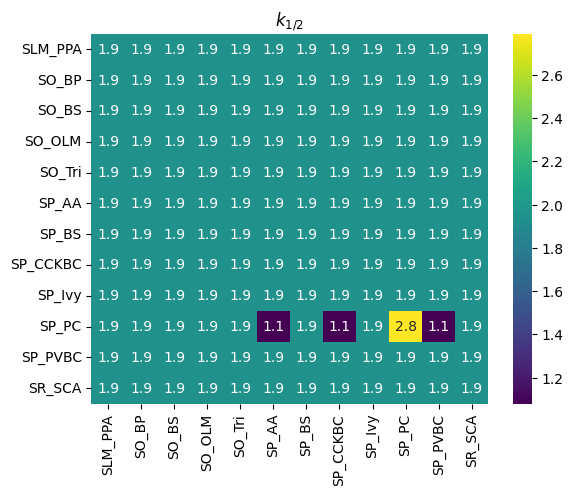

In [45]:
sns.heatmap(df, annot=True, cmap='viridis')
plt.title(r'$k_{1/2}$')

In [46]:
# Define the calcium concentrations
calcium_concentrations = [1.2,2.25]

# Define the "k" values and corresponding "u_max" values as dictionaries
k_values = {'pair1': 0.5, 'pair2': 0.3, 'pair3': 0.2}
u_max_values = {'pair1': 10, 'pair2': 8, 'pair3': 12}

# Calculate "u" for each pair of "k" and "u_max" values across calcium concentrations
for pair, k in k_values.items():
    u_max = u_max_values[pair]
    u_values = []
    for ca in calcium_concentrations:
        u = u_max * (ca**4 / (ca**4 + k**4))
        u_values.append(u)